In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Get training data
dataframe = pd.read_csv("ex1data1.txt", header = None)
dataframe.columns = ['Population', 'Profit']
print(dataframe)

    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


In [3]:
#Convert training data to np arrays
x = dataframe['Population'].to_numpy()
y = dataframe['Profit'].to_numpy()


#Adding ones in front for convenience later when calculating bias weight
#c_ is a numpy function for concatinating slices with each other
Y = y.reshape(97,1)
X = np.c_[np.ones(len(x)),x]

Text(0.5, 1.0, 'Data')

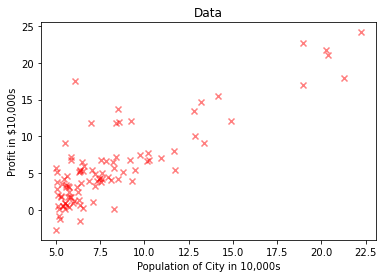

In [4]:
#Visualization
plt.scatter(x,y,c = "Red",marker="x", alpha=0.5)
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of City in 10,000s")
plt.title("Data")

In [7]:
#Cost function
def computecost(x,y,theta):
    m = x.shape[0]
    a = 1/(2*m)
    #@ is a numpy operator for matrix multiplication
    #theta is broadcasted to X due to dimension difference
    b = np.sum(((x@theta)-y)**2)
    j = (a)*(b)
    return j

#gradient descent function
def gradientdescent(x,y,theta, alpha, EPOCHS):
    m = len(x)
    h = np.dot(x,theta)
    error = h-y
    #print(h.shape)
    #print(y.shape)
    #print(error.shape)
    #print(x.shape)
    costlist = []
    for iter in range(EPOCHS):
        h = np.dot(x,theta)
        error = h-y
        theta = theta - (alpha/m)*np.dot(x.transpose(),error)
        costlist.append(computecost(x,y,theta))
    return theta, costlist

32.072733877455676
4.47802760987997


Text(0.5, 1.0, 'Cost Analysis')

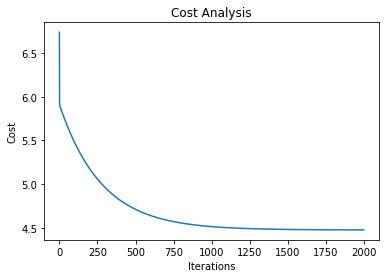

In [8]:
#Initialize Parameters
EPOCHS = 2000
alpha = 0.01
theta = np.zeros([2,1])
print(computecost(X,Y,theta))

theta, J  = gradientdescent(X,Y,theta,alpha,EPOCHS)
print(computecost(X,Y,theta))
plt.plot(list(range(EPOCHS)),J,'-')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Analysis")


Text(0.5, 1.0, 'Data')

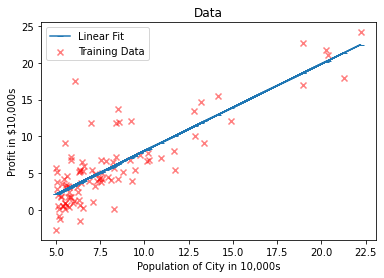

In [9]:
plt.scatter(x,y,c='Red',marker='x',alpha=0.5)
plt.plot(x,X@theta,marker='_')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of City in 10,000s")
plt.legend(["Linear Fit","Training Data"])
plt.title("Data")